# 1. Make an EDA process on the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

### Loading and reading dataset

In [3]:

encodings = ['utf-8', 'latin1', 'ISO-8859-1']

for encoding in encodings:
    try:
        df = pd.read_csv('ITBLogisticDataset.csv', encoding=encoding)
        print(f"File loaded successfully with encoding: {encoding}")
        break
    except UnicodeDecodeError as e:
        print(f"Failed to load with encoding {encoding}: {e}")

if df is not None:
    print(df.head())
else:
    print("Failed to load the dataset with all attempted encodings.")

Failed to load with encoding utf-8: 'utf-8' codec can't decode byte 0xfa in position 2: invalid start byte
File loaded successfully with encoding: latin1
       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Cat

### Shape of the data

In [4]:
df.shape

(180519, 53)

### Data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

### Descriptive statistics

In [6]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [7]:
df.columns.tolist()

['Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Id',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Email',
 'Customer Fname',
 'Customer Id',
 'Customer Lname',
 'Customer Password',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Customer Zipcode',
 'Department Id',
 'Department Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'Order Customer Id',
 'order date (DateOrders)',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Region',
 'Order State',
 'Order Status',
 'Order Zipcode',
 'Product Card Id',
 'Product Category Id',
 'Product Description',
 'Product Image',
 'Product Name',
 'Product P

### Check for missing values:

In [8]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


### Check duplicate values 

In [9]:
duplicates = df.duplicated().sum()
print(duplicates)

0


In [10]:
df.nunique()

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


In [11]:
# 1. Tổng doanh thu toàn bộ công ty
total_sales = df['Sales'].sum()
print("Tổng doanh thu của cả công ty:", total_sales)



Tổng doanh thu của cả công ty: 36784735.01337984


In [12]:
# 2. Tỷ lệ lợi nhuận của cả công ty
total_benefit = df['Benefit per order'].sum()
total_order_item_total = df['Order Item Total'].sum()
profit_ratio = total_benefit / total_order_item_total
print("Tỷ lệ lợi nhuận của cả công ty:", profit_ratio)


Tỷ lệ lợi nhuận của cả công ty: 0.12001133550744779


Tổng doanh thu theo từng market:
         Market         Sales
0        Africa  2.294453e+06
1        Europe  1.087240e+07
2         LATAM  1.027761e+07
3  Pacific Asia  8.273744e+06
4          USCA  5.066529e+06


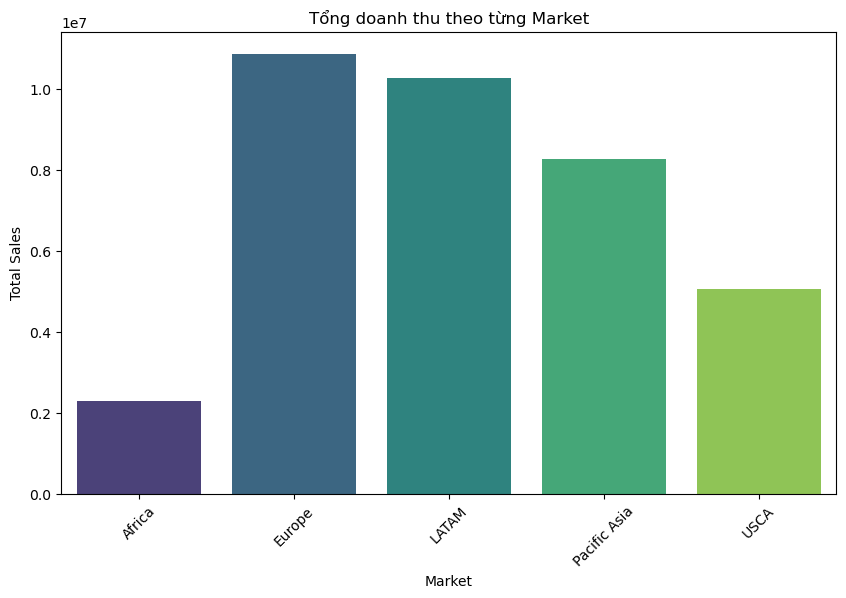

In [37]:
# 3. Tổng doanh thu theo từng market
sales_by_market = df.groupby('Market')['Sales'].sum().reset_index()
print("Tổng doanh thu theo từng market:")
print(sales_by_market)
# Vẽ biểu đồ Tổng doanh thu theo từng market
plt.figure(figsize=(10, 6))
sns.barplot(x='Market', y='Sales', data=sales_by_market, palette='viridis')
plt.title('Tổng doanh thu theo từng Market')
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


Top 5 khách hàng có Tổng doanh thu lớn nhất:
      Customer Fname Customer Lname         Sales
9379            Mary          Smith  4.771646e+06
11629         Robert          Smith  1.522310e+05
5708           James          Smith  1.479244e+05
3102           David          Smith  1.457768e+05
6296            John          Smith  1.298826e+05


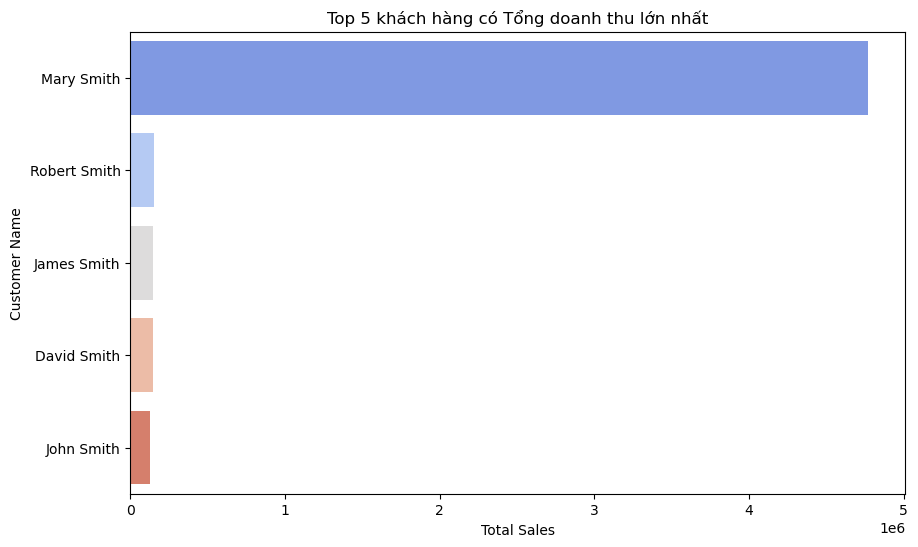

In [14]:
# 4. Top 5 khách hàng có Tổng doanh thu lớn nhất
top_customers = df.groupby(['Customer Fname', 'Customer Lname'])['Sales'].sum().reset_index()
top_customers = top_customers.sort_values(by='Sales', ascending=False).head(5)
print("Top 5 khách hàng có Tổng doanh thu lớn nhất:")
print(top_customers)
# Vẽ biểu đồ top 5 khách hàng có total sale lớn nhất
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y=top_customers['Customer Fname'] + ' ' + top_customers['Customer Lname'], data=top_customers, palette='coolwarm')
plt.title('Top 5 khách hàng có Tổng doanh thu lớn nhất')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.show()




Top 5 loại sản phẩm có tổng lợi nhuận cao nhất:
       Category Name  Benefit per order
18           Fishing      756220.767190
12            Cleats      494636.919791
9   Camping & Hiking      427455.568106
10  Cardio Equipment      383011.098485
47   Women's Apparel      350421.029567


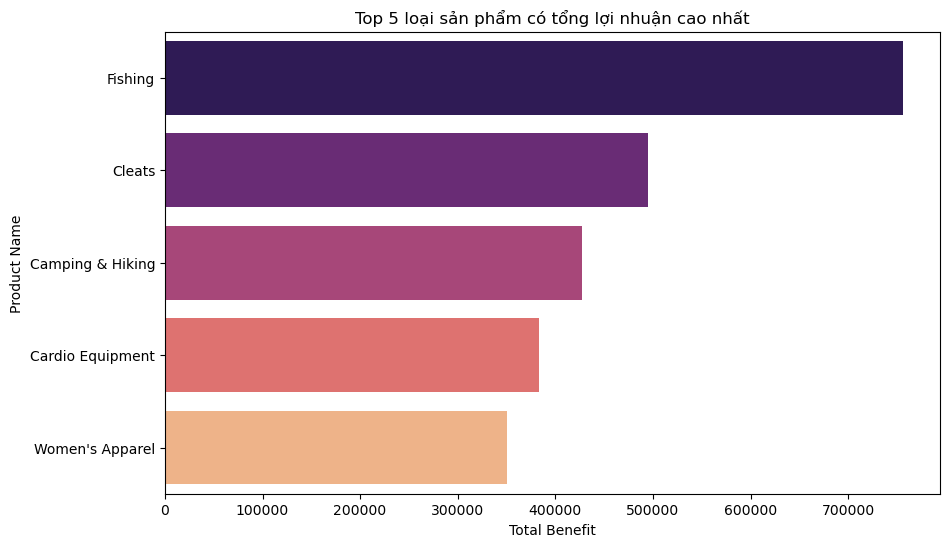

In [15]:
# 5. Top 5 loại sản phẩm có tổng lợi nhuận (benefit) cao nhất
top_products = df.groupby('Category Name')['Benefit per order'].sum().reset_index()
top_products = top_products.sort_values(by='Benefit per order', ascending=False).head(5)
print("Top 5 loại sản phẩm có tổng lợi nhuận cao nhất:")
print(top_products)


# Vẽ biểu đồ top 5 loại sản phẩm có tổng lợi nhuận cao nhất
plt.figure(figsize=(10, 6))
sns.barplot(x='Benefit per order', y='Category Name', data=top_products, palette='magma')
plt.title('Top 5 loại sản phẩm có tổng lợi nhuận cao nhất')
plt.xlabel('Total Benefit')
plt.ylabel('Product Name')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_17004\574354407.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Year', y='Sales', data=annual_sales, marker='o', palette='viridis')
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


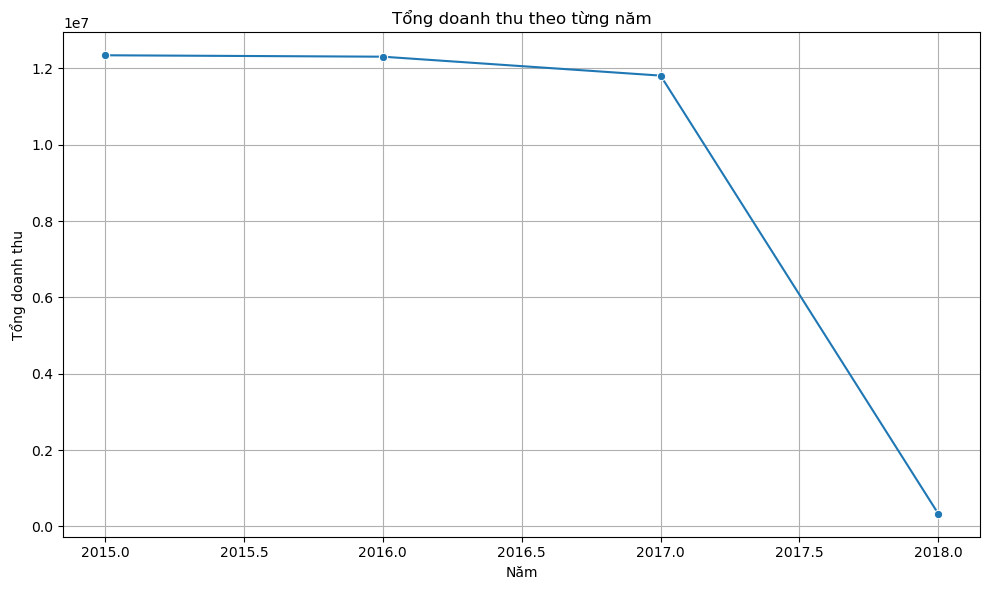

In [30]:

# Chuyển đổi cột ngày tháng thành định dạng ngày tháng
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])


df['Year'] = df['order date (DateOrders)'].dt.year
annual_sales = df.groupby('Year')['Sales'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Sales', data=annual_sales, marker='o', palette='viridis')
plt.title('Tổng doanh thu theo từng năm')
plt.xlabel('Năm')
plt.ylabel('Tổng doanh thu')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


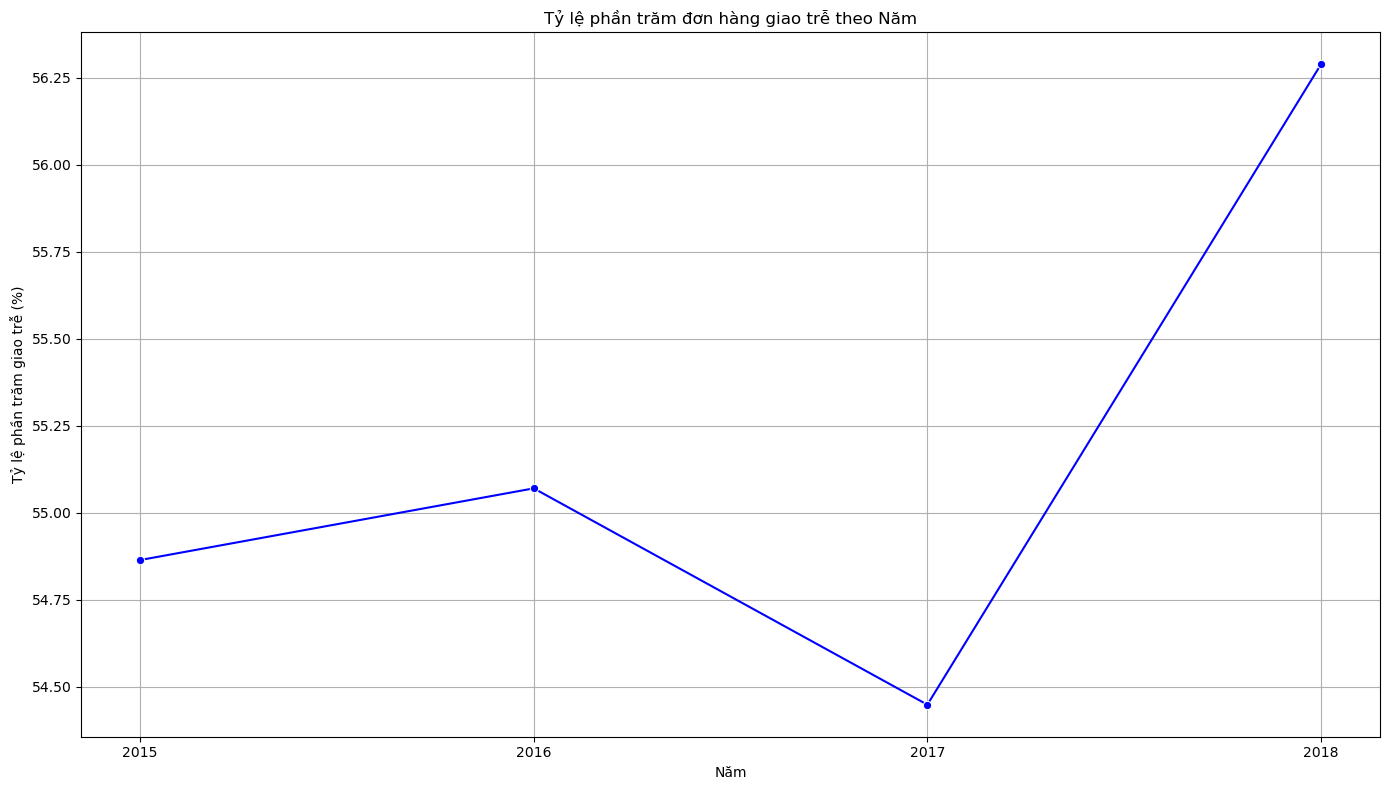

In [38]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])


df['Year'] = df['order date (DateOrders)'].dt.year


df_late = df[df['Late_delivery_risk'] == 1]

# Tính tổng số đơn hàng giao trễ toàn công ty theo năm
total_late_orders_by_year = df_late.groupby('Year').size().reset_index(name='Total Late Orders')

# Tính tổng số đơn hàng toàn công ty theo năm
total_orders_by_year = df.groupby('Year').size().reset_index(name='Total Orders')


summary = pd.merge(total_late_orders_by_year, total_orders_by_year, on='Year')


summary['Late Percentage'] = (summary['Total Late Orders'] / summary['Total Orders']) * 100

# Sắp xếp tỷ lệ phần trăm giảm dần theo năm
sorted_summary = summary.sort_values(by='Year')
plt.figure(figsize=(14, 8))
sns.lineplot(data=sorted_summary, x='Year', y='Late Percentage', marker='o', color='blue')
plt.title('Tỷ lệ phần trăm đơn hàng giao trễ theo Năm')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ phần trăm giao trễ (%)')


plt.xticks(ticks=sorted_summary['Year'], labels=sorted_summary['Year'].astype(str))

plt.grid(True)
plt.tight_layout()
plt.show()

### Delete Customer Password, Product Image, Product Description

In [17]:
df = df.drop(columns=['Customer Password', 'Product Image', 'Product Description', 'Customer Email'])

In [18]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastán,PENDING,NaN,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,NaN,1360,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,NaN,1360,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,NaN,1360,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
